In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
print(sklearn.__version__)

1.8.0


### Utility functions

In [3]:
def plot_decision_boundary(X, y, clf, title, xlab, ylab):
    fig, ax = plt.subplots(figsize=(6,4))
    
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 0].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Make a Prediction on every grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Blues)
    
    # Define markers and colors for each class
    markers = ['o', '^', '*']
    colors = ['black', 'orange', 'yellow']
    labels = np.unique(y)
    
    # Plot the original data (each class with a different marker and color)
    for i, label in enumerate(labels):
        X_sub = X[y == label]
        ax.scatter(X_sub[:, 0], 
                   X_sub[:, 1], 
                   marker=markers[i], 
                   color=colors[i], 
                   label=f'Class {label}')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.tight_layout();

### Load the data

In [4]:
iris = load_iris(as_frame=True)
df = pd.concat([iris.data, iris.target], axis=1)

In [5]:
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

In [6]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


### Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(120, 2)
(120,)
(30, 2)
(30,)
(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


### Feature scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())
print()
print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.1 6.7
0.1 6.9

-1.5834673107234525 1.7179076233888417
-1.5262852230656692 1.7902758610857707


### SVC (linear kernel)

In [11]:
model = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_scaled, y_train)

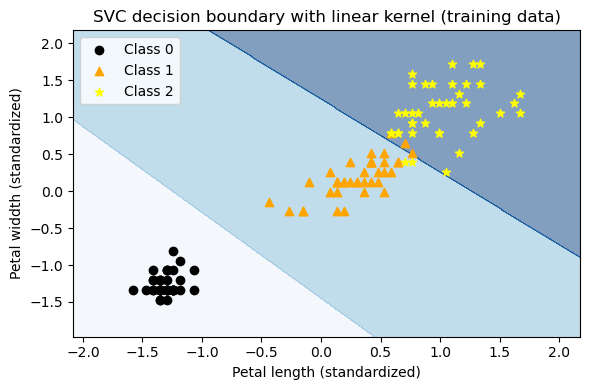

In [12]:
plot_decision_boundary(X=X_train_scaled, 
                       y=y_train, 
                       clf=model, 
                       title='SVC decision boundary with linear kernel (training data)',
                       xlab='Petal length (standardized)',
                       ylab='Petal widdth (standardized)')

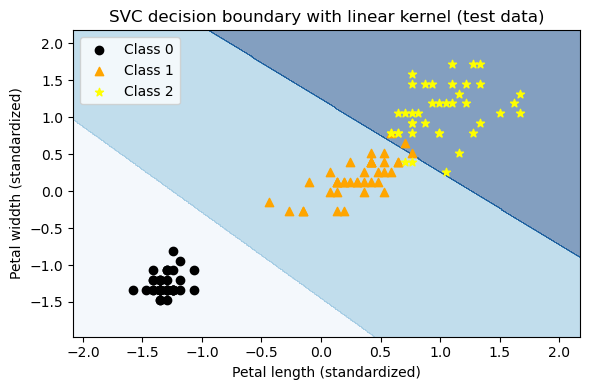

In [13]:
plot_decision_boundary(X=X_train_scaled, 
                       y=y_train, 
                       clf=model, 
                       title='SVC decision boundary with linear kernel (test data)',
                       xlab='Petal length (standardized)',
                       ylab='Petal widdth (standardized)')

In [14]:
# Training accuracy
model.score(X_train_scaled, y_train)

0.9583333333333334

In [15]:
# Test accuracy
model.score(X_test_scaled, y_test)

0.9666666666666667

### SVC (nonlinear kernel)

Using a nonlinear **kernel** allows one to solve nonlinear classification problems.

In [4]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

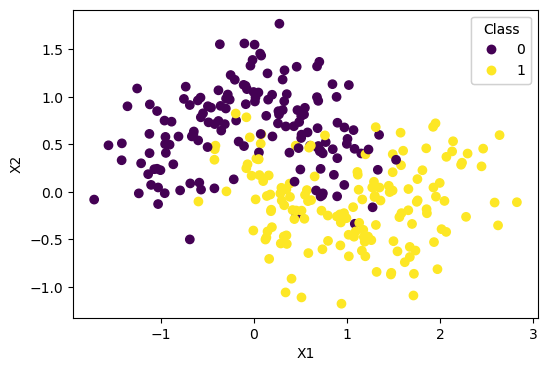

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(X[:, 0], X[:, 1], c=y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

legend = ax.legend(*sc.legend_elements(), title='Class')
ax.add_artist(legend);

- Clearly, if a linear decision boundary is fitted here, the classification error will be large (and bias will be high).

In [6]:
# Train-test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model2 = SVC(kernel='rbf', 
             gamma=0.1, 
             C=10.0, 
             random_state=1).fit(X_train_scaled, y_train)

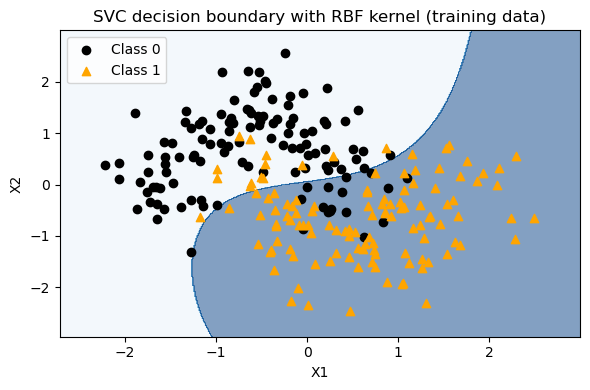

In [8]:
plot_decision_boundary(X=X_train_scaled, 
                       y=y_train, 
                       clf=model2, 
                       title='SVC decision boundary with RBF kernel (training data)',
                       xlab='X1',
                       ylab='X2')

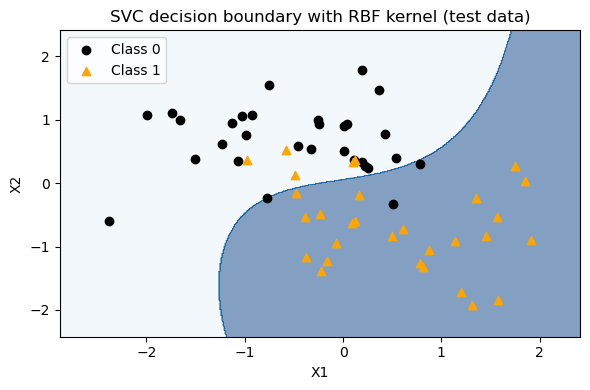

In [9]:
plot_decision_boundary(X=X_test_scaled, 
                       y=y_test, 
                       clf=model2, 
                       title='SVC decision boundary with RBF kernel (test data)',
                       xlab='X1',
                       ylab='X2')

In [10]:
# Training accuracy
model2.score(X_train_scaled, y_train)

0.875

In [11]:
# Test accuracy
model2.score(X_test_scaled, y_test)

0.8666666666666667

#### A note on the $\, \gamma \,$ parameter in the RBF kernel

- For an SVC with an RBF (Gaussian) kernel, the $\, \gamma \,$ parameter controls how “hard” or “locally” the model fits the training data.
- Hence, it is an important hyperparameter to tune, as it plays a major role in controlling overfitting/variance of a SVC with an RBF kernel.
- It is defined as $\, \gamma = \frac{1}{2 \sigma^2} \,$ $\, \rightarrow \,$ $\, \gamma \ge 0. \,$
- $\, \gamma \,$ determines how local the influence of each training point is.

Let's illustrate this by fitting multiple models with different values of $\, \gamma. \,$

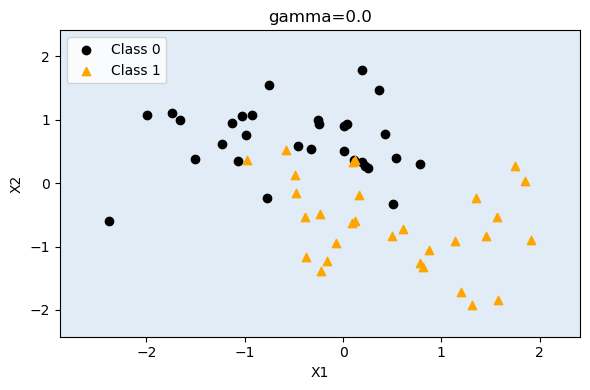

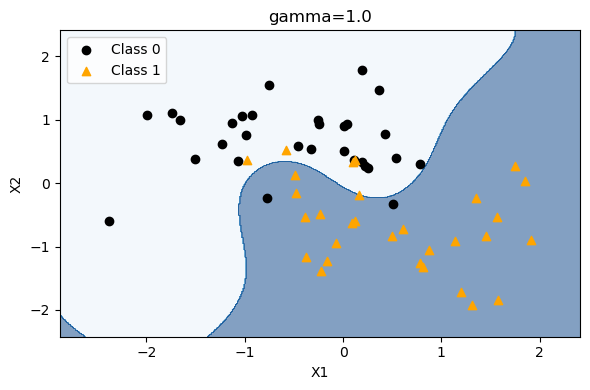

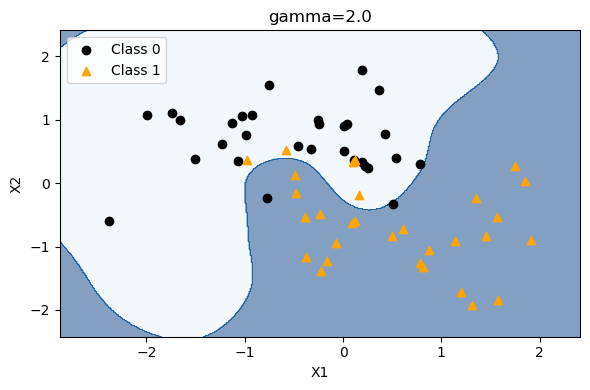

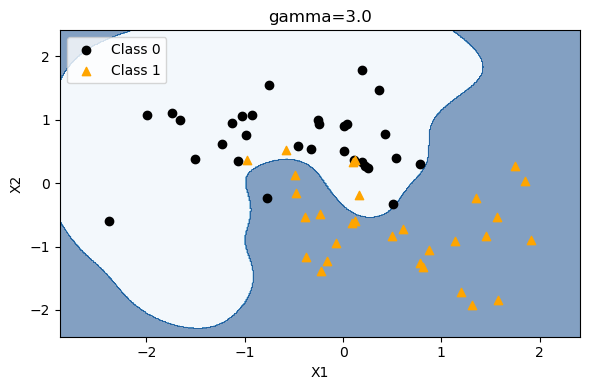

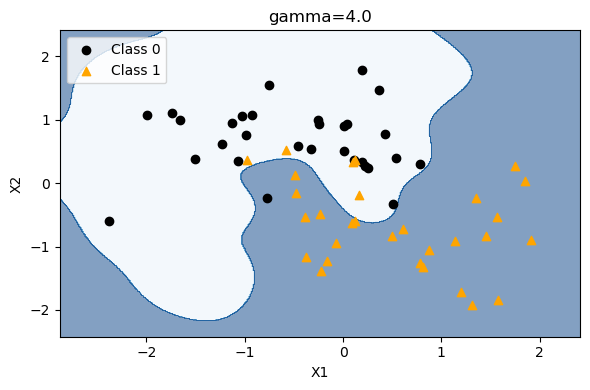

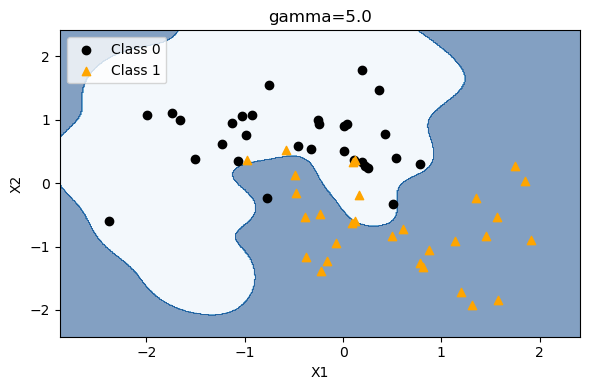

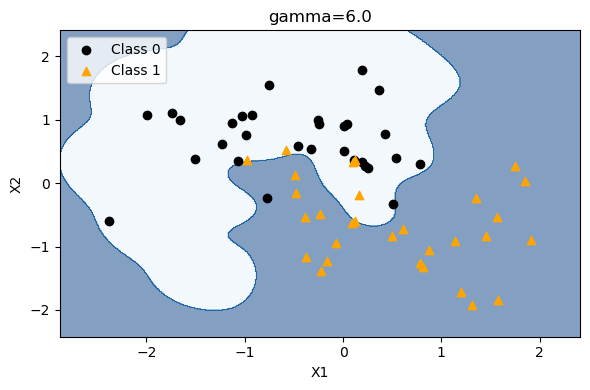

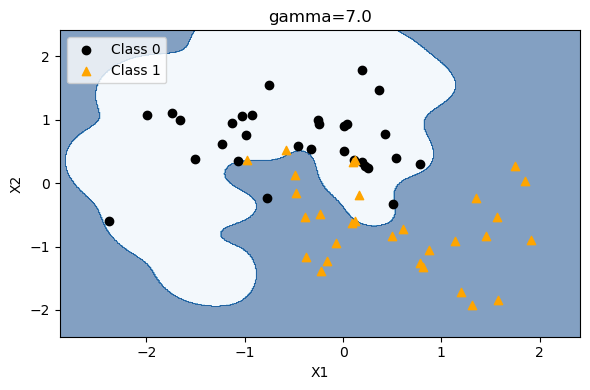

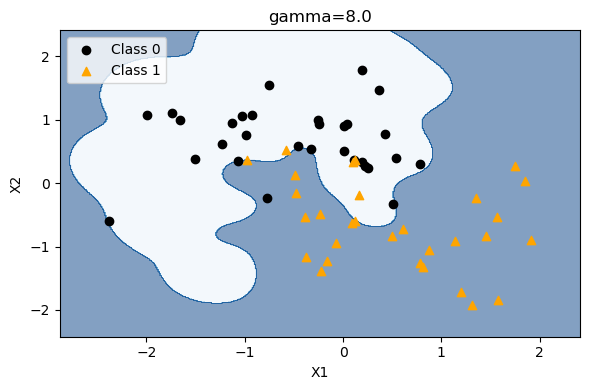

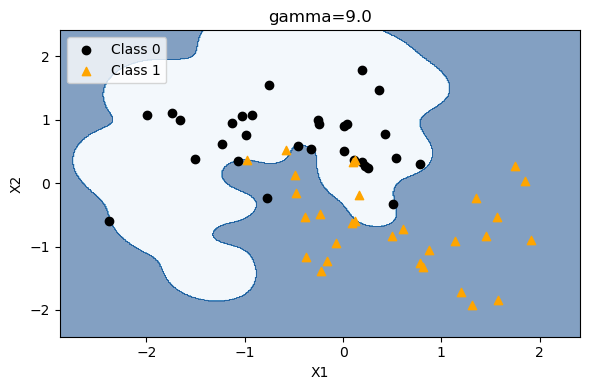

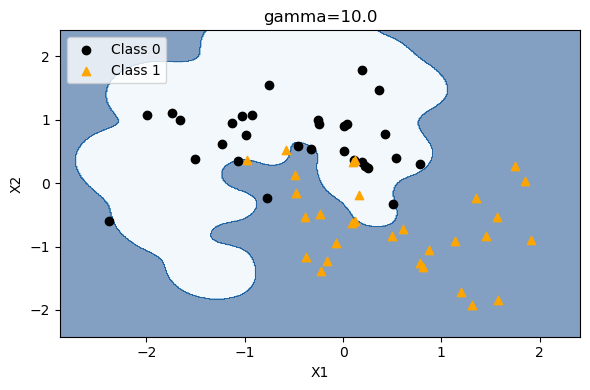

In [19]:
gammas = np.linspace(0, 10, 11)
for g in gammas:
    clf = SVC(kernel='rbf',
              gamma=g,
              C=1.0,
              random_state=42).fit(X_train_scaled, y_train)
    plot_decision_boundary(X=X_test_scaled, 
                           y=y_test, 
                           clf=clf, 
                           title=f'gamma={g}',
                           xlab='X1',
                           ylab='X2')